# EMAIL SPAM DETECTION WITH MACHINE LEARNING

In [1]:
import os

# Introduction to Task 4

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.

In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. Let’s get
started!

# Load the Required Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# modelling lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

# Load the Dataset

In [3]:
os.getcwd()

'C:\\Users\\perni Ravi Teja'

In [22]:
os.chdir("C:\\Users\\perni Ravi Teja\\OneDrive\\Desktop")

In [29]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")



In [30]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Exploratory Data Analysis

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


From above we can see unnamed 2, unnamed 3, unnamed 4 are NA. so we can drop them.

In [32]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [33]:
# we can drop unnamed 2, unnamed 3, unnamed 4
df. drop(columns= ["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
df['v2'].value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

We can see there are repaeted duplicate values. we can remove duplicates.

In [39]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [40]:
# null values
df.isnull().sum()

v1    0
v2    0
dtype: int64

# Data Visualization

<AxesSubplot:xlabel='v1', ylabel='count'>

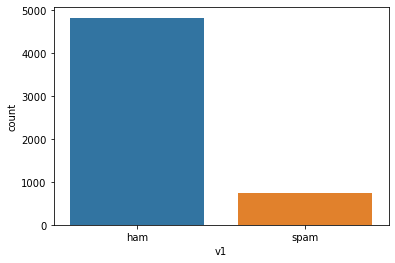

In [41]:
# we have only v1 as categorical so we can use countplot for frequency
sns.countplot(data= df, x='v1')

As we can see from above data set we can see spam has very less spam emails.

# Label Encoding

In [42]:
# converting v1 into numerical from categorical
le = LabelEncoder()
df['v1']= le.fit_transform(df['v1'])
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# ML Model Training

In [46]:
# X and y features
X= df['v2']
y=df['v1']

In [47]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=20)

In [48]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3900,), (1672,), (3900,), (1672,))

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

extract = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)

# train and test into numerical

X_train_feat = extract.fit_transform(X_train)
X_test_feat = extract.transform(X_test)

# Convert the target values into 0 and 1

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [50]:
print(X_train_feat)

  (0, 4092)	0.3396041813655839
  (0, 2895)	0.2745244067950913
  (0, 3408)	0.3569916767953008
  (0, 1961)	0.20599136611335583
  (0, 2317)	0.28604808926305353
  (0, 6626)	0.39829647805889073
  (0, 4073)	0.2621307834291805
  (0, 5913)	0.2844496229166933
  (0, 6541)	0.30116778715614
  (0, 3009)	0.39829647805889073
  (1, 4979)	0.21136007071436522
  (1, 4095)	0.14068987259521248
  (1, 257)	0.24751755359570976
  (1, 293)	0.16330430021088518
  (1, 562)	0.24751755359570976
  (1, 6521)	0.24751755359570976
  (1, 3714)	0.22107139635347728
  (1, 447)	0.24751755359570976
  (1, 1297)	0.17134857940176723
  (1, 4674)	0.17348749777811232
  (1, 1676)	0.24751755359570976
  (1, 647)	0.24751755359570976
  (1, 5352)	0.12531196697812372
  (1, 6736)	0.17702606929862177
  (1, 6299)	0.20750606228311175
  :	:
  (3897, 5565)	0.27608034691593825
  (3897, 3179)	0.29632449774444564
  (3897, 6222)	0.3123931842440073
  (3897, 3678)	0.25064351235438537
  (3897, 6008)	0.1872804457320845
  (3897, 4063)	0.24138529572807096

# Training with Logistic Regression

In [51]:
lr = LogisticRegression()
lr.fit(X_train_feat,y_train)

LogisticRegression()

In [52]:
y_pred= lr.predict(X_test_feat)
print("Logistic Regression Accuracy score", accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_pred,y_test))
print("R-Squared value : ", r2_score(y_test,y_pred))

Logistic Regression Accuracy score 95.21531100478468
[[1436   77]
 [   3  156]]
R-Squared value :  0.6010581979020959


# Training with Decision tree Classification

In [53]:
dc = DecisionTreeClassifier(random_state=0)
dc.fit(X_train_feat,y_train)

DecisionTreeClassifier(random_state=0)

In [54]:
y_pred= lr.predict(X_test_feat)
print("Decision tree Classification Accuracy score", accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_pred,y_test))
print("R-Squared value : ", r2_score(y_test,y_pred))

Decision tree Classification Accuracy score 95.21531100478468
[[1436   77]
 [   3  156]]
R-Squared value :  0.6010581979020959
